# Regularization

## Defining the problem

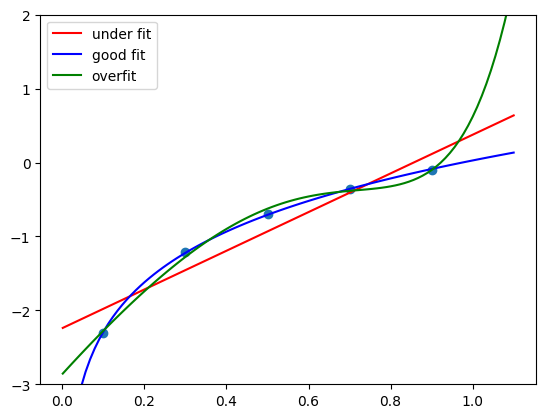

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(47878)

x = np.linspace(.1, .9, 5).reshape(5, 1)
y = (np.log(x)).reshape(x.shape)

def gradient_descent(theta, x, y, k=1000, alpha=0.1):
    h = lambda theta, x: x @ theta
    gradJ = lambda theta: 1. / x.shape[0] * ((h(theta, x) - y) * x).sum(axis=0).reshape(theta.shape)
    for _ in range(k):
        theta = theta - alpha * gradJ(theta)
    return theta

X_linear = np.hstack((np.ones(x.shape), x))
theta_linear = gradient_descent(np.random.rand(2, 1), x=X_linear, y=y, k=1_000, alpha=.1)

X_log = np.hstack((np.ones(x.shape), x, np.log(x)))
theta_log = gradient_descent(np.random.rand(3, 1), x=X_log, y=y, k=1_000, alpha=.1)

X_poly = np.hstack((np.ones(x.shape), x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9))
theta_poly = gradient_descent(np.random.rand(10, 1), x=X_poly, y=y, k=10_000, alpha=1)

fig, ax = plt.subplots()
ax.scatter(x, y)
lin = np.linspace(0.001, 1.1, 100)

ax.plot(lin, theta_linear[0] + theta_linear[1] * lin, '-r', label="under fit")

ax.plot(lin, theta_log[0] + theta_log[1] * lin + theta_log[2] * np.log(lin), '-b', label="good fit")

ax.plot(lin, 0 
     + theta_poly[0] * lin ** 0
     + theta_poly[1] * lin ** 1
     + theta_poly[2] * lin ** 2
     + theta_poly[3] * lin ** 3
     + theta_poly[4] * lin ** 4
     + theta_poly[5] * lin ** 5
     + theta_poly[6] * lin ** 6
     + theta_poly[7] * lin ** 7
     + theta_poly[8] * lin ** 8
     + theta_poly[9] * lin ** 9
    , '-g', label="overfit")

plt.ylim(-3, 2)

ax.legend()

plt.show()

## Regularized linear regression

- Training examples: $x = [1, x_1, x_2, \cdots, x_n]^{\mathsf T}$, $n$ is number of features.
- Cost function: $J(\theta) = \frac 1{2m}\displaystyle\sum_{i=1}^m[h_\theta(x_i) - y_i]^2 + \tfrac\lambda{2m} \sum_{i=1}^{n} \theta_i^2$, $\lambda$ is regularization parameter.
- Gradient: $\nabla_\theta J(\theta) = \tfrac1m \left(\displaystyle\sum_i [h_\theta(x_i) - x_i] \,x_i + \lambda \delta \theta\right)$, $\delta \theta = [0,\, \theta_1,\, \theta_2,\, \cdots, \theta_n]^{\mathsf T}$.

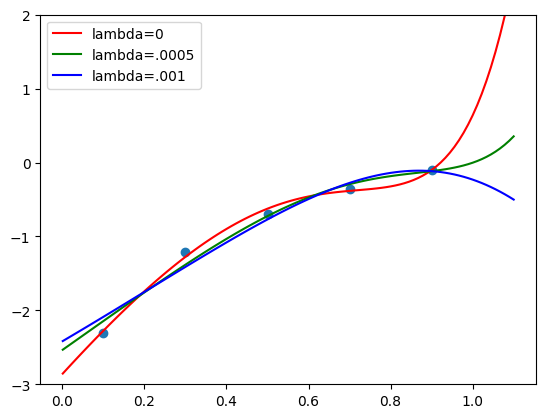

In [2]:
def gradient_descent(theta, x, y, k=1000, alpha=0.1, lam=0):
    h = lambda theta, x: x @ theta
    delta = np.ones(theta.shape)
    delta[0] = 0
    gradJ = lambda theta: 1. / x.shape[0] * (((h(theta, x) - y) * x).sum(axis=0).reshape(theta.shape) + lam * theta * delta)
    for _ in range(k):
        theta = theta - alpha * gradJ(theta)
    return theta

X_poly = np.hstack((np.ones(x.shape), x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9))

theta0 = np.random.rand(10, 1)
theta_l0 = gradient_descent(np.copy(theta0), x=X_poly, y=y, k=10_000, alpha=1, lam=0)
theta_l0005 = gradient_descent(np.copy(theta0), x=X_poly, y=y, k=10_000, alpha=1, lam=0.005)
theta_l001 = gradient_descent(np.copy(theta0), x=X_poly, y=y, k=10_000, alpha=1, lam=0.01)

fig, ax = plt.subplots()
ax.scatter(x, y)
lin = np.linspace(0.001, 1.1, 100)

h = lambda theta, x: 0\
     + theta[0] * x ** 0\
     + theta[1] * x ** 1\
     + theta[2] * x ** 2\
     + theta[3] * x ** 3\
     + theta[4] * x ** 4\
     + theta[5] * x ** 5\
     + theta[6] * x ** 6\
     + theta[7] * x ** 7\
     + theta[8] * x ** 8\
     + theta[9] * x ** 9

ax.plot(lin, h(theta_l0, lin), '-r', label="lambda=0")
ax.plot(lin, h(theta_l0005, lin), '-g', label="lambda=.0005")
ax.plot(lin, h(theta_l001, lin), '-b', label="lambda=.001")

plt.ylim(-3, 2)

ax.legend()

plt.show()

## Normal equation with regularization

$$
\theta = [X^{\mathsf T}X + \lambda \,\text{diag}(0, 1, 1, 1, \cdots, 1)]^{-1}X^{\mathsf T}y
$$

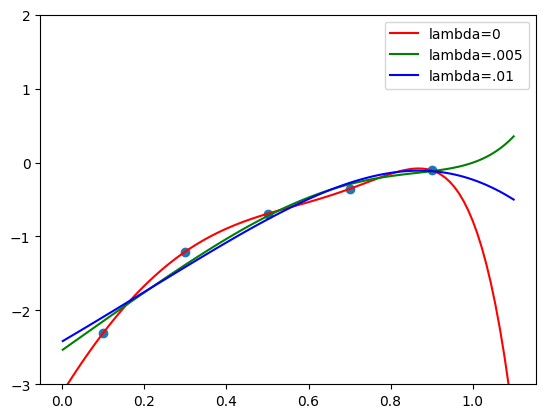

In [3]:

X_poly = np.hstack((np.ones(x.shape), x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9))

eye = np.eye(10)
eye[0, 0] = 0
normal_eq = lambda X, y, lam: np.linalg.pinv((X.T @ X) + lam * eye) @ X.T @ y

theta_l0 = normal_eq(X_poly, y, lam=0)
theta_l005 = normal_eq(X_poly, y, lam=0.005)
theta_l01 = normal_eq(X_poly, y, lam=0.01)

fig, ax = plt.subplots()
ax.scatter(x, y)
lin = np.linspace(0.001, 1.1, 100)

h = lambda theta, x: 0\
     + theta[0] * x ** 0\
     + theta[1] * x ** 1\
     + theta[2] * x ** 2\
     + theta[3] * x ** 3\
     + theta[4] * x ** 4\
     + theta[5] * x ** 5\
     + theta[6] * x ** 6\
     + theta[7] * x ** 7\
     + theta[8] * x ** 8\
     + theta[9] * x ** 9

ax.plot(lin, h(theta_l0, lin), '-r', label="lambda=0")
ax.plot(lin, h(theta_l005, lin), '-g', label="lambda=.005")
ax.plot(lin, h(theta_l01, lin), '-b', label="lambda=.01")

plt.ylim(-3, 2)

ax.legend()

plt.show()

## Regularized logistic regression

- Training examples: $x = [1, x_1, x_2, \cdots, x_n]^{\mathsf T}$, $n$ is number of features.
- Cost function: $J(\theta) = -\frac 1{m}\displaystyle\sum_{i=1}^m \left[ y_i \log h_\theta(x_i) + (1-y_i) \log(1-h_\theta(x_i))\right] + \tfrac\lambda{2m} \sum_{i=1}^{n} \theta_i^2$, $\lambda$ is regularization parameter.
- Gradient: $\nabla_\theta J(\theta) = \tfrac1m \left(\displaystyle\sum_i [h_\theta(x_i) - x_i] \,x_i + \lambda \delta \theta\right)$, $\delta \theta = [0,\, \theta_1,\, \theta_2,\, \cdots, \theta_n]^{\mathsf T}$.

In [4]:
def gradient_descent(theta, x, y, k=1000, alpha=0.1, lam=0):
    h = lambda theta, x: 1. / (1 + np.exp(-x @ theta))
    delta = np.ones(theta.shape)
    delta[0] = 0
    gradJ = lambda theta: 1. / x.shape[0] * (((h(theta, x) - y) * x).sum(axis=0).reshape(theta.shape) + lam * theta * delta)
    for _ in range(k):
        theta = theta - alpha * gradJ(theta)
    return theta

np.random.seed(42)
x = np.array([
    [0, 0],
    [1, 0],
    [2, 0],
    [3, 0],
    [0, 1],
    [1, 1],
    [2, 1],
    [3, 1],
    [0, 2],
    [1, 2],
    [2, 2],
    [3, 2],
    [4, 2],
    [1, 3],
    [3, 3],
    [2, 4],
    [4, 4],
    [1, 5],
    [3, 5],

])
y = np.array([
    [0],
    [0],
    [0],
    [0],
    [0],
    [1],
    [0],
    [1],
    [0],
    [0],
    [1],
    [0],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
])

x0 = x[:, 0].reshape(x.shape[0], 1)
x1 = x[:, 1].reshape(x.shape[0], 1)
X = np.hstack((np.ones((x.shape[0], 1)), x, x ** 2, x0 * x1, x0 **2 * x1, x0 * x1 **2, x0 ** 3, x1 ** 3))

p = np.linspace(-1, 5, 300)
q = np.linspace(-1, 6, 300)
P, Q = np.meshgrid(p, q)
hPQ = lambda theta, P, Q: 1. / (1. + np.exp(-(
    theta[0] 
    + theta[1] * P 
    + theta[2] * Q 
    + theta[3] * P ** 2 
    + theta[4] * Q ** 2 
    + theta[5] * P * Q 
    + theta[6] * P ** 2 * Q 
    + theta[7] * P * Q ** 2 
    + theta[8] * P ** 3 
    + theta[9] * Q ** 3)))

theta_lambda0 = gradient_descent(np.random.rand(X.shape[1], 1), X, y, k=100_000, alpha=.5, lam=0)
theta_lambda001 = gradient_descent(np.random.rand(X.shape[1], 1), X, y, k=100_000, alpha=.5, lam=0.001)
theta_lambda005 = gradient_descent(np.random.rand(X.shape[1], 1), X, y, k=100_000, alpha=.5, lam=0.005)
theta_lambda05 = gradient_descent(np.random.rand(X.shape[1], 1), X, y, k=100_000, alpha=.5, lam=0.05)

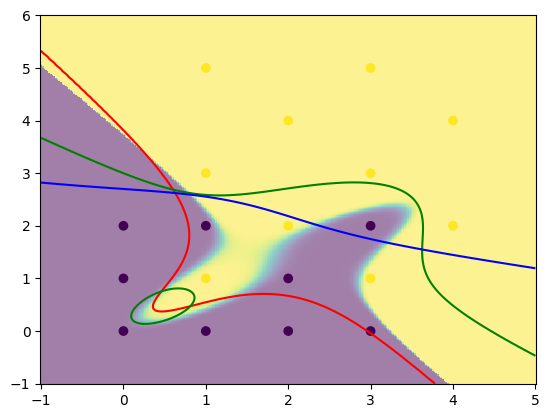

In [5]:
fig, ax = plt.subplots()
map = ax.pcolormesh(P, Q, hPQ(theta_lambda0, P, Q), alpha=0.5)
ax.scatter(x[:, 0], x[:, 1], c=y)
c0 = plt.contour(P, Q, hPQ(theta_lambda001, P, Q), levels=[0.5], colors = ["red"])
c1 = plt.contour(P, Q, hPQ(theta_lambda005, P, Q), levels=[0.5], colors = ["green"])
c2 = plt.contour(P, Q, hPQ(theta_lambda05, P, Q), levels=[0.5], colors = ["blue"])
plt.show()